# Importing libraries

In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# For data 'emotion_dataset_2'

In [2]:
data=pd.read_csv('emotion_dataset_2.csv')

In [3]:
data.Emotion.value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [4]:
data.drop(columns=['Unnamed: 0','Clean_Text'],inplace=True)

In [5]:
emotion=['sadness','fear','anger','neutral']

In [6]:
data=data[data['Emotion'].isin(emotion)==True]

In [7]:
data.Emotion.value_counts()

sadness    6722
fear       5410
anger      4297
neutral    2254
Name: Emotion, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18683 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  18683 non-null  object
 1   Text     18683 non-null  object
dtypes: object(2)
memory usage: 437.9+ KB


# For data 'train.txt',test.txt and valid.txt

In [9]:
# Read datasets
df_train = pd.read_csv('train.txt', names=['Text', 'Emotion'], sep=';')
df_val = pd.read_csv('val.txt', names=['Text', 'Emotion'], sep=';')
df_test = pd.read_csv('test.txt', names=['Text', 'Emotion'], sep=';')

In [10]:
print(df_train)

                                                    Text  Emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]


In [11]:
#print the shape of the data set
print(df_train.shape)

(16000, 2)


In [12]:
#print first 5 rows
df_test.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [13]:
df=pd.concat([df_train,df_test,df_val])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     20000 non-null  object
 1   Emotion  20000 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


In [15]:
df.Emotion.value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

# For data tweet_emotions.csv

In [16]:
new_df=pd.read_csv('tweet_emotions.csv')

In [17]:
new_df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [18]:
new_df.drop('tweet_id',axis=1,inplace=True)

In [19]:
new_df.rename(columns={'sentiment':'Emotion','content':'Text'},inplace=True)

In [20]:
new_df.Emotion.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: Emotion, dtype: int64

# Merging all data

In [21]:
merged_df=pd.concat([df,new_df,data])

In [22]:
merged_df.shape

(78683, 2)

In [23]:
merged_df.Emotion.value_counts()

sadness       17684
neutral       10892
worry          8459
fear           7783
anger          7116
joy            6761
love           5483
happiness      5209
surprise       2906
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: Emotion, dtype: int64


# Cleaning merged data

In [24]:
emotions=['sadness','anger','fear','joy','neutral','happiness','relief','love','enthusiasm','worry','hate']

In [25]:
final_df=merged_df[merged_df.Emotion.isin(emotions)==True]

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72995 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     72995 non-null  object
 1   Emotion  72995 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [27]:
final_df['Emotion'].replace(['sadness'], "sad", inplace=True)
final_df['Emotion'].replace(['happiness','love','joy'], "happy", inplace=True)
final_df['Emotion'].replace(['anger','hate'], "angry", inplace=True)
final_df['Emotion'].replace(['worry'], "fear", inplace=True)
final_df['Emotion'].replace(['enthusiasm','relief'], "neutral", inplace=True)



C:\Users\dongo\AppData\Local\Temp\ipykernel_2896\1348617185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Emotion'].replace(['sadness'], "sad", inplace=True)
C:\Users\dongo\AppData\Local\Temp\ipykernel_2896\1348617185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Emotion'].replace(['happiness','love','joy'], "happy", inplace=True)
C:\Users\dongo\AppData\Local\Temp\ipykernel_2896\1348617185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [28]:
final_df.Emotion.value_counts()

sad        17684
happy      17453
fear       16242
neutral    13177
angry       8439
Name: Emotion, dtype: int64

In [29]:
#print the number of null values in each column
final_df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72995 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     72995 non-null  object
 1   Emotion  72995 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [31]:
final_df['Text'].duplicated().value_counts()

False    69772
True      3223
Name: Text, dtype: int64

The data doesn't contains any null values

In [32]:
#print the number of duplicated values 
final_df.duplicated().sum()

3144

There is just one row which is duplicated but we need to check also if there are rows having the same text but different emotions

In [33]:
#removing duplicated values
index = final_df[final_df.duplicated() == True].index
final_df.drop(index, axis = 0, inplace = True)
final_df.reset_index(inplace=True, drop = True)

C:\Users\dongo\AppData\Local\Temp\ipykernel_2896\2884414561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(index, axis = 0, inplace = True)


In [34]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66305 entries, 0 to 66304
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     66305 non-null  object
 1   Emotion  66305 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


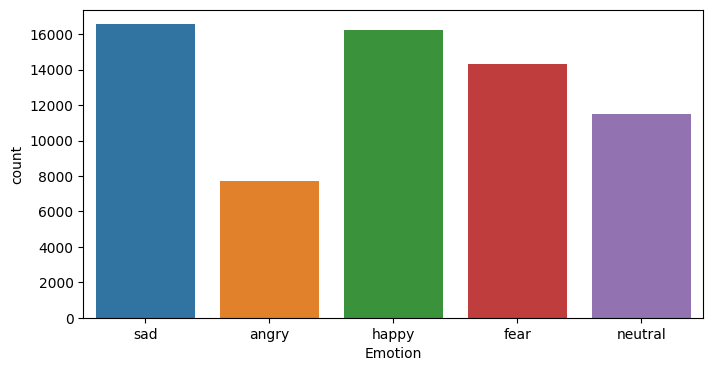

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=final_df);

In [36]:
#print the rows which are duplicated (duplicated in the text but with different emotions)
final_df[final_df['Text'].duplicated() == True]

,Text,Emotion
6099,i tend to stop breathing when i m feeling stre...,angry
7056,i was intensely conscious of how much cash i h...,sad
9017,i often find myself feeling assaulted by a mul...,sad
12153,i feel like a tortured artist when i talk to her,angry
13653,i resorted to yesterday the post peak day of i...,fear
...,...,...
62852,I don't think you really want to hear about i...,sad
63036,Yeah ?,fear
63688,Don't mixing #cosmetic brands. If it works fo...,neutral
64514,"Well , you always say you're busy .",sad


In [37]:
#print some of those rows to check
final_df[final_df['Text'] == final_df.iloc[42271]['Text']]

,Text,Emotion
42271,Come on guys tell me how much your theater cha...,angry


In [38]:
#removing duplicated text 
index = final_df[final_df['Text'].duplicated() == True].index
final_df.drop(index, axis = 0, inplace = True)
final_df.reset_index(inplace=True, drop = True)

C:\Users\dongo\AppData\Local\Temp\ipykernel_2896\834086814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(index, axis = 0, inplace = True)


In [39]:
#Count the number of stopwords in the data
temp =final_df.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['Text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
# temp.stop_words.value_counts()

## Cleaning

In [40]:
final_df

,Text,Emotion
0,i didnt feel humiliated,sad
1,i can go from feeling so hopeless to so damned...,sad
2,im grabbing a minute to post i feel greedy wrong,angry
3,i am ever feeling nostalgic about the fireplac...,happy
4,i am feeling grouchy,angry
...,...,...
66228,Love when i dont beat my highscore in doodleju...,angry
66229,"@JulieCarney27 world of pain... But, got up,bo...",fear
66230,A man robbed me today .,angry
66231,"Youu call it JEALOUSY, I call it of #Losing YO...",fear


In [41]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]
    
    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    
    text = text.split()

    text=[y.lower() for y in text]
    
    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    
    text = re.sub("_comma_", " ", text)
    
    text = re.sub("comma", "", text)
    text =  " ".join(text.split())
    
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

            
def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(str(text)))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

    

In [42]:
final_df= normalize_text(final_df)

C:\Users\dongo\AppData\Local\Temp\ipykernel_2896\11449722.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Text=df.Text.apply(lambda text : lower_case(str(text)))
C:\Users\dongo\AppData\Local\Temp\ipykernel_2896\11449722.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Text=df.Text.apply(lambda text : remove_stop_words(text))
C:\Users\dongo\AppData\Local\Temp\ipykernel_2896\11449722.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [43]:
final_df=final_df.drop_duplicates()

In [44]:
final_df.isna().sum()

Text       0
Emotion    0
dtype: int64

In [45]:
final_df.to_csv('final_df.csv',index=False)

# Augment data

In [46]:
# !pip install nlpaug

In [47]:
import nlpaug
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

aug2 = naw.SynonymAug(aug_src='wordnet',aug_max=2)
# aug = naw.ContextualWordEmbsAug(aug_max=2)
# aug1 = nas.ContextualWordEmbsForSentenceAug()
aug_data=[]
emo=[]
def augment(df,emotion):
    for text in df['Text']:
#         print(text)    
        new=aug2.augment(str(text),n=1)
#         print(str(t))
        t=str(new).strip("[]")
        aug_data.append(str(t).strip("''"))
        emo.append(str(emotion))
    return (pd.DataFrame({'Text':aug_data,'Emotion':emo}))

C:\Users\dongo\anaconda\envs\new\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (None)/charset_normalizer (3.0.1) doesn't match a supported version!
  warnings.warn(


In [48]:
angry_data=final_df[final_df['Emotion']=='angry']
auf= augment(angry_data,'angry')

In [49]:
neutral_data=final_df[final_df['Emotion']=='neutral']

n_rows=neutral_data.shape[0]
random_indices = np.random.choice(n_rows, size=int(n_rows / 3), replace=False)
selected_rows = neutral_data.iloc[random_indices]

auf1= augment(selected_rows,'neutral')

In [50]:
final_df=pd.concat([final_df,auf1])

In [51]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76749 entries, 0 to 11317
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     76749 non-null  object
 1   Emotion  76749 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [52]:
final_df.Emotion.value_counts()

sad        16423
happy      16101
angry      15266
neutral    14741
fear       14218
Name: Emotion, dtype: int64

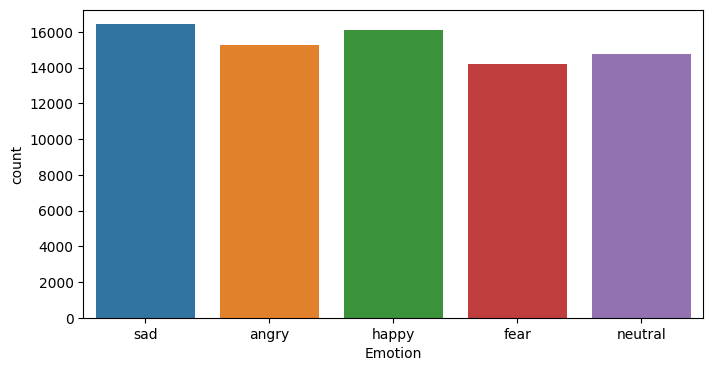

In [53]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=final_df);

In [54]:
label_map = {
    'sad': 0,
    'angry': 1,
    'fear':2,
    'happy':3,
    'neutral':4
}

In [55]:
final_df['Emotion'] = final_df['Emotion'].map(label_map)

In [56]:
final_df

,Text,Emotion
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,1
3,ever feeling nostalgic fireplace know still pr...,3
4,feeling grouchy,1
...,...,...
11313,aminakader thought exactly,4
11314,fuschiafoot sold hit cash took tax tip drawer ...,4
11315,cinnamoncloud comfortably ether buy dvd wailt ...,4
11316,mcgiff thanks share,4


In [57]:
final_df.isna().sum()

Text       0
Emotion    0
dtype: int64

In [58]:
final_df=final_df.dropna()

In [59]:
final_df=final_df.drop_duplicates()

In [60]:
final_df.to_csv('FinalData.csv',index=False)